In [35]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime

%matplotlib inline

In [37]:
chicago = pd.read_csv("prepared_data.csv", parse_dates=["start_time","end_time"])

# hinzufügen des Monats
chicago['month']= chicago["start_time"].apply(lambda x: x.month)
chicago_m = chicago[chicago['month'] == 5]
chicago_m.head(3)

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,month
627525,628548,2016-05-31 23:57:00,2016-06-01 00:14:00,22,282,May St & Taylor St,Halsted St & Maxwell St,609,Subscriber,17.0,5
627526,628549,2016-05-31 23:57:00,2016-06-01 00:14:00,22,282,May St & Taylor St,Halsted St & Maxwell St,1207,Subscriber,17.0,5
627527,628550,2016-05-31 23:56:00,2016-06-01 00:15:00,90,320,Millennium Park,Loomis St & Lexington St,4369,Subscriber,19.0,5


In [38]:
print(chicago['start_time'].size)
print(chicago_m['start_time'].size)

3586330
362441


In [39]:
chicago_m["duration"] = (chicago_m["end_time"] - chicago_m["start_time"]).astype("timedelta64[m]")
chicago_m["day"] = chicago_m["start_time"].apply(lambda x: x.day)
chicago_m["hour"] = chicago_m["start_time"].apply(lambda x: x.hour)
chicago_m.head(3)

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,month,day,hour
627525,628548,2016-05-31 23:57:00,2016-06-01 00:14:00,22,282,May St & Taylor St,Halsted St & Maxwell St,609,Subscriber,17.0,5,31,23
627526,628549,2016-05-31 23:57:00,2016-06-01 00:14:00,22,282,May St & Taylor St,Halsted St & Maxwell St,1207,Subscriber,17.0,5,31,23
627527,628550,2016-05-31 23:56:00,2016-06-01 00:15:00,90,320,Millennium Park,Loomis St & Lexington St,4369,Subscriber,19.0,5,31,23


In [40]:
# hinzufügen der Wetterdaten
weather = pd.read_csv("weather_hourly_chicago.csv",parse_dates = ["date_time"])
#add day feature
#only keep may 2016 data
weather = weather[weather["date_time"].apply(lambda x:x.year == 2016 and x.month == 5)]
weather = weather.dropna()
weather["hour"] = weather["date_time"].apply(lambda x:x.hour)
weather["day"] = weather["date_time"].apply(lambda x:x.day)
weather.sort_values(by="date_time")
weather.head(1)

,date_time,max_temp,min_temp,precip,hour,day
11640,2016-05-01,7.2,7.2,1.0,0,1


In [41]:
chicago_m = chicago_m.merge(weather[["max_temp","min_temp","precip","hour","day"]],left_on=["day","hour"],right_on=["day","hour"])
chicago_m.head()

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,month,day,hour,max_temp,min_temp,precip
0,628632,2016-05-31 22:59:00,2016-05-31 23:14:00,117,232,Wilton Ave & Belmont Ave,Pine Grove Ave & Waveland Ave,991,Customer,15.0,5,31,22,18.9,18.9,1.0
1,628634,2016-05-31 22:59:00,2016-05-31 23:07:00,59,282,Wabash Ave & Roosevelt Rd,Halsted St & Maxwell St,560,Subscriber,8.0,5,31,22,18.9,18.9,1.0
2,628635,2016-05-31 22:59:00,2016-05-31 23:15:00,226,504,Racine Ave & Belmont Ave,Campbell Ave & Fullerton Ave,5057,Subscriber,16.0,5,31,22,18.9,18.9,1.0
3,628636,2016-05-31 22:58:00,2016-05-31 23:05:00,123,290,California Ave & Milwaukee Ave,Kedzie Ave & Palmer Ct,1453,Subscriber,7.0,5,31,22,18.9,18.9,1.0
4,628637,2016-05-31 22:57:00,2016-05-31 23:14:00,349,84,Halsted St & Wrightwood Ave,Union Ave & Grand Ave,48,Customer,17.0,5,31,22,18.9,18.9,1.0


In [44]:
relevant_col = chicago_m
relevant_col= relevant_col[["start_time","month","day","hour","max_temp","precip","bike_id"]]
feature_data = relevant_col.resample("H",on="start_time").agg({"month":"mean","day":"mean","hour":"mean","max_temp":"mean","precip":"mean","bike_id":"count"})
feature_data.rename(columns={"bike_id":"trips"},inplace=True)
feature_data.head(1)

,month,day,hour,max_temp,precip,trips
start_time,,,,,,
2016-05-01,5.0,1.0,0.0,7.2,1.0,25


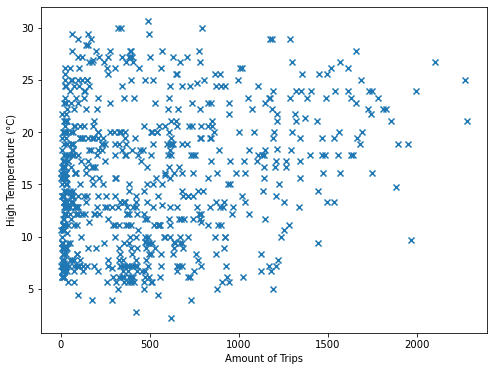

In [64]:
Xp = feature_data["trips"].values
Yp = feature_data["max_temp"].values
plt.figure(figsize = (8,6))
plt.scatter(Xp, Yp, marker="x")
plt.xlabel("Amount of Trips")
plt.ylabel("High Temperature (°C)")
plt.show()

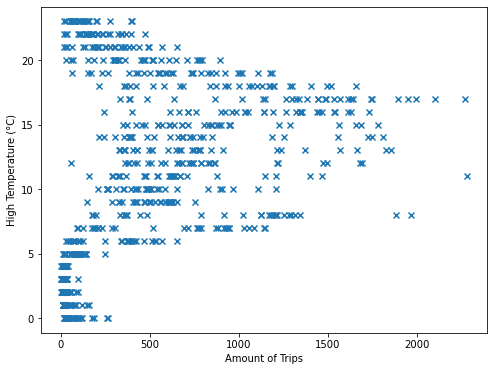

In [69]:
Xp = feature_data["trips"].values
Yp = feature_data["hour"].values
plt.figure(figsize = (8,6))
plt.scatter(Xp, Yp, marker="x")
plt.xlabel("Amount of Trips")
plt.ylabel("High Temperature (°C)")
plt.show()

In [70]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

def plot_tree_regression_line(tree_depth):

    # Fit regression model (to full data)
    Tree_reg = DecisionTreeRegressor(max_depth=tree_depth,criterion="mse")
    Tree_reg.fit(Xp.reshape((-1,1)), Yp) 
    
    attributes = Tree_reg.tree_

    # plot
    plt.figure(figsize = (8,6))
    plt.scatter(Xp, Yp, marker="x")
    plt.plot(np.arange(-18,40,1), Tree_reg.predict(np.arange(-18,40,1).reshape((-1,1))), marker="x", color='C1')
    plt.xlabel("High Temperature (°C)", fontsize=16)
    plt.ylabel("Peak Demand (GW)", fontsize=16)
    
    print("number of nodes: ", attributes.node_count)
    print("number of leafs: ", attributes.n_leaves)
    
    #plt.savefig("Peak_Power_Regression_Lines_{}depth.pdf".format(tree_depth))

In [71]:
plot_tree_regression_line(50)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').